In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

%matplotlib inline

In [2]:
jobs = pd.read_pickle('jobs2.pkl')
jobs

,job_title,company,location,job_desc,full_time,part_time,temporary,internship,contract,permanent,salary
0,Product Lead,unavailable,Tiong Bahru Estate,Mission: Your mission is to build a world cl...,0,0,0,0,0,0,NaN
1,Product Manager,99.co,Singapore,99.co is looking for an experienced Product Ma...,0,0,0,0,0,0,7800.0
2,Regional Marketing Manager GC GCMS,Thermo Fisher Scientific,Woodlands,Job Description Job Title: Regional Marketing ...,0,0,0,0,0,0,NaN
3,Regional Product Specialist Insurance,unavailable,Outram,The Job: Reporting directly to the Regional ...,1,0,0,0,0,1,NaN
4,Interchange and Pricing Analyst,Adyen,Singapore,Adyen is looking for a Interchange & Pricing A...,0,0,0,0,0,0,NaN
5,VP Data Analyst GTO,United Overseas Bank,Singapore,Functional area: Business Technology Services ...,0,0,0,0,0,0,NaN
6,Desktop Engineer,unavailable,Singapore,"Be a ‘roaming’ engineer, moving to and coverin...",1,0,0,0,0,1,NaN
7,Consultant Senior Consultant Banking Business...,Synpulse,Singapore,"Responsibilities: Conduct research, data coll...",0,0,0,0,0,0,NaN
8,R&D Programme Manager,ST Electronics (Satcom & Sensor Systems) Pte Ltd,Singapore,"Job Responsibilities: Project planning, manage...",0,0,0,0,0,0,NaN
9,Associate Specialist Cybersecurity DSP CLT ...,MSD,Singapore,The trainee will undergo a 9 - 12-month progr...,0,0,0,0,0,0,NaN


In [3]:
jobs.salary.mean()

5989.316239316239

In [4]:
jobs.salary.median()

5100.0

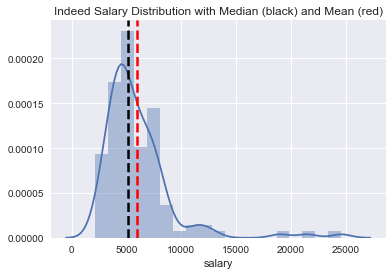

In [10]:
#plotting salary distribution, with vertical lines to represent the mean and median salary
ax = sns.distplot(jobs_sal["salary"])
ax.axvline(jobs_sal["salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(jobs_sal["salary"].mean(), lw=2.5, ls='dashed', color='red')
sns.plt.title('Indeed Salary Distribution with Median (black) and Mean (red)')

We can see that salary's distribution is positively skewed. We will choose median as the decision factor since mean is slightly affected by the few high earners.

We will classify the jobs into salary > median or salary <= median. 

In [7]:
# creating new target variable "above_med_sal" where 0 for salary <= the median, and 1 for salary > the median;
# any postings without salary information will have NaN values for this variable
jobs["above_med_sal"] = np.nan
jobs.loc[jobs["salary"] > jobs["salary"].median(), "above_med_sal"] = 1
jobs.loc[jobs["salary"] <= jobs["salary"].median(), "above_med_sal"] = 0
jobs.tail()

,job_title,company,location,job_desc,full_time,part_time,temporary,internship,contract,permanent,salary,above_med_sal
3009,Sales Business Officer,POWER INDUSTRIES SERVICES Pte Ltd,Singapore,The position shall be responsible Meeting regu...,1,0,0,0,0,1,NaN,NaN
3010,Airline Business Solution Consultant,unavailable,Pasir Ris,"PURPOSE Achieve the strategic, financial and...",0,0,0,0,0,0,NaN,NaN
3011,Senior Data Scientist Singapore,Aspire HK,Singapore,Time to work with Kaggle champs and an award-w...,1,0,0,0,0,1,NaN,NaN
3012,Technical Sales Specialist,Thermo Fisher Scientific,Woodlands,Job Description Responsible to provide techni...,0,0,0,0,0,0,NaN,NaN
3013,TPCE PEEI Process Engineer,Apple,Toa Payoh,Job Description: As a Backend End Central Te...,1,0,0,0,0,1,NaN,NaN


In [8]:
jobs_sal = jobs[~jobs.salary.isnull()]
# jobs_sal.reset_index(drop=True, inplace=True)
jobs_sal

,job_title,company,location,job_desc,full_time,part_time,temporary,internship,contract,permanent,salary,above_med_sal
1,Product Manager,99.co,Singapore,99.co is looking for an experienced Product Ma...,0,0,0,0,0,0,7800.0,1.0
29,Product Analyst,New Step Search Pte Ltd,Central Business District,Job SummaryOur client is an innovative Singapo...,1,0,0,0,0,1,7000.0,1.0
44,Data Science Manager,Tuple Technologies Pte Ltd,Singapore,We are looking for a Data Science Manager who ...,0,0,0,0,0,0,6000.0,1.0
51,NLP ENGINEER K K Somerset IT Industry,Forte Employment Services Pte Ltd,Singapore,"JOB DESCRIPTIONDesign, develop, test and deplo...",0,0,0,0,0,0,13000.0,1.0
85,Drafter Sungei Khadut . days up to $ **Ope...,KSC Consultants Pte Ltd,Singapore,Responsibilities: Co-ordinate closely with cli...,0,0,0,0,0,0,3650.0,0.0
117,AMS Card Access Administrator,HrFocus,Singapore,Job SummaryAn Administrator with IT background...,0,0,0,0,0,0,2300.0,0.0
119,Associate Test Engineers,The Supreme HR Advisory Pte Ltd,Singapore,"Job SummaryPerforms the set-up, calibration, t...",0,0,0,0,0,0,4300.0,0.0
197,Software Engineer,Ulventech,Singapore,Job SummaryWe are looking for talented and pas...,0,0,0,0,0,0,5500.0,1.0
208,IT Support Engineer Project Management,D.V.I Solutions ( Singapore HQ),Kallang,"Job SummaryProvide IT supports on daily basis,...",0,0,0,0,0,0,4000.0,0.0
244,Front End Engineer,Yolo Technology Pte Ltd,Kallang,Job SummaryWe are looking for experienced and ...,0,0,0,0,0,0,6250.0,1.0


In [9]:
jobs_sal.above_med_sal.value_counts()

0.0    59
1.0    58
Name: above_med_sal, dtype: int64

In [11]:
X_jobsal = jobs_sal.iloc[:, :-2]
y_jobsal = jobs_sal.iloc[:, -1]

In [13]:
# Using the textacy package to do some more comprehensive preprocessing
from textacy.preprocess import preprocess_text

titles = X_jobsal['job_title'].values
clean_titles = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in titles]

comp = X_jobsal['company'].values
clean_comp = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in comp]

jd = X_jobsal['job_desc'].values
clean_jd = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in jd]

In [14]:
print(titles[0:3])

['Product Manager' 'Product Analyst' 'Data Science Manager']


In [15]:
print(clean_titles[0:3])

['product manager', 'product analyst', 'data science manager']


In [16]:
print(comp[0:3])

['99.co' 'New Step Search Pte Ltd' 'Tuple Technologies Pte Ltd']


In [17]:
print(clean_comp[0:3])

['99co', 'new step search pte ltd', 'tuple technologies pte ltd']


In [18]:
print(jd[0:3])

[ "99.co is looking for an experienced Product Manager to join our diverse team of people who are passionate about taking the real estate industry properly into the age of technology through innovation and a desire to solve its multitude of challenges.As Senior Product Manager, you will be responsible for plotting the course and future of our product, navigating your team through unchartered territory and unpredictable storms to reach new heights. Your work will constantly set new standards for the age-old industry and help thousands of buyers and renters set up home every year.What you'll doDrive product direction and strategy.Own the product roadmap, objectives and KPIs.Define and execute go-to-market plans /strategies.Conduct A/B tests and lead data analysis.Understand user needs and behavior.Perform market research and competitive analysis.Oversee product execution from inception to delivery.Person we are looking for MUST have/are/be: A Bachelor’s degree from a top university, pref

In [19]:
print(clean_jd[0:3])

['99co is looking for an experienced product manager to join our diverse team of people who are passionate about taking the real estate industry properly into the age of technology through innovation and a desire to solve its multitude of challengesas senior product manager you will be responsible for plotting the course and future of our product navigating your team through unchartered territory and unpredictable storms to reach new heights your work will constantly set new standards for the ageold industry and help thousands of buyers and renters set up home every yearwhat youll dodrive product direction and strategyown the product roadmap objectives and kpisdefine and execute gotomarket plans strategiesconduct ab tests and lead data analysisunderstand user needs and behaviorperform market research and competitive analysisoversee product execution from inception to deliveryperson we are looking for must havearebe a bachelors degree from a top university preferably in computer science

In [20]:
# Preprocess our text data to Tfidf
tfv = TfidfVectorizer(ngram_range=(1,3), max_features=2000)
X_titles = tfv.fit_transform(clean_titles).toarray()
dftitles = pd.DataFrame(X_titles, columns=tfv.get_feature_names())
print(dftitles.shape)

tfv1 = TfidfVectorizer(ngram_range=(1,3), max_features=2000)
X_comp = tfv1.fit_transform(clean_comp).toarray()
dfcomp = pd.DataFrame(X_comp, columns=tfv1.get_feature_names())
print(dfcomp.shape)

tfv2 = TfidfVectorizer(ngram_range=(1,3), max_features=1500)
X_jd = tfv2.fit_transform(clean_jd).toarray()
dfjd = pd.DataFrame(X_jd, columns=tfv2.get_feature_names())
print(dfjd.shape)

(117, 616)
(117, 459)
(117, 1500)


In [25]:
dfjobtype = jobs_sal.loc[:, ['full_time','part_time','temporary','contract','permanent']]
dfjobtype.reset_index(drop=True, inplace=True)
dfjobtype.head()

,full_time,part_time,temporary,contract,permanent
0,0,0,0,0,0
1,1,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [27]:
X_vec = pd.concat([dftitles, dfcomp, dfjd, dfjobtype], axis=1)
X_vec.shape

(117, 2580)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_jobsal, test_size = 0.25)

In [34]:
# majority class is 0
base_accuracy = 1 - y_jobsal.mean()
print('Base Accuracy Score: ' + str(base_accuracy))

Base Accuracy Score: 0.5042735042735043


In [35]:
# Running Logistic Regression to classify test set:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy Score: ' + str(logreg.score(X_test, y_test)))
print('=============================================================')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('=============================================================')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy Score: 0.833333333333
Classification Report:
             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        14
        1.0       1.00      0.69      0.81        16

avg / total       0.88      0.83      0.83        30

Confusion Matrix:
    0   1
0  14   0
1   5  11


In [38]:
# Running Random forest with gridsearch to classify test set:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 
           "n_estimators" : range(1,40,1),
           "max_depth" : range(1,40,1),
}

rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, n_jobs=3, scoring='f1')
rfc.fit(X_train, y_train)

best_rfc = rfc.best_estimator_
print('Best Parameters: ' + str(rfc.best_params_))
print('=============================================================')
print('Best Accuracy Score: ' + str(rfc.best_score_))
print('=============================================================')
print('Classification Report:')
print(classification_report(y_test, rfc.predict(X_test)))
print('=============================================================')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, rfc.predict(X_test))))

Fitting 5 folds for each of 1521 candidates, totalling 7605 fits


[Parallel(n_jobs=3)]: Done 170 tasks      | elapsed:   11.5s
[Parallel(n_jobs=3)]: Done 2570 tasks      | elapsed:   40.9s
[Parallel(n_jobs=3)]: Done 6570 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 7605 out of 7605 | elapsed:  1.8min finished


Best Parameters: {'max_depth': 7, 'n_estimators': 39}
Best Accuracy Score: 0.760969713556
Classification Report:
             precision    recall  f1-score   support

        0.0       0.75      0.86      0.80        14
        1.0       0.86      0.75      0.80        16

avg / total       0.81      0.80      0.80        30

Confusion Matrix:
    0   1
0  12   2
1   4  12


Using the best model we will predict the if the rest of the job data without salary information have above median salary of \$5100.


In [39]:
jobs_nosal = jobs[jobs.salary.isnull()]
jobs_nosal.shape

(2897, 12)

In [40]:
X_nosal = jobs_nosal.iloc[:, :-2]
y_nosal = jobs_nosal.iloc[:, -1]

In [41]:
# Using the textacy package to do some more comprehensive preprocessing
from textacy.preprocess import preprocess_text

ntitles = X_nosal['job_title'].values
clean_ntitles = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in ntitles]

ncomp = X_nosal['company'].values
clean_ncomp = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in ncomp]

njd = X_nosal['job_desc'].values
clean_njd = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in njd]

In [42]:
# Preprocess our text data to Tfidf
tfv3 = TfidfVectorizer(ngram_range=(1,3), max_features=616)
X_ntitles = tfv3.fit_transform(clean_ntitles).toarray()
dfntitles = pd.DataFrame(X_ntitles, columns=tfv3.get_feature_names())
print(dfntitles.shape)

tfv4 = TfidfVectorizer(ngram_range=(1,3), max_features=459)
X_ncomp = tfv4.fit_transform(clean_ncomp).toarray()
dfncomp = pd.DataFrame(X_ncomp, columns=tfv4.get_feature_names())
print(dfncomp.shape)

tfv5 = TfidfVectorizer(ngram_range=(1,3), max_features=1500)
X_njd = tfv5.fit_transform(clean_ncomp).toarray()
dfnjd = pd.DataFrame(X_njd, columns=tfv5.get_feature_names())
print(dfnjd.shape)

(2897, 616)
(2897, 459)
(2897, 1500)


In [43]:
dfnjobtype = jobs_nosal.loc[:, ['full_time','part_time','temporary','contract','permanent']]
dfnjobtype.reset_index(drop=True, inplace=True)
dfnjobtype.head()

,full_time,part_time,temporary,contract,permanent
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [44]:
X_nvec = pd.concat([dfntitles, dfncomp, dfnjd, dfnjobtype], axis=1)
X_nvec.shape

(2897, 2580)

In [45]:
y_pred2 = logreg.predict(X_nvec)
jobs_nosal['above_med_sal'] = y_pred2
jobs_nosal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,job_title,company,location,job_desc,full_time,part_time,temporary,internship,contract,permanent,salary,above_med_sal
0,Product Lead,unavailable,Tiong Bahru Estate,Mission: Your mission is to build a world cl...,0,0,0,0,0,0,NaN,0.0
2,Regional Marketing Manager GC GCMS,Thermo Fisher Scientific,Woodlands,Job Description Job Title: Regional Marketing ...,0,0,0,0,0,0,NaN,0.0
3,Regional Product Specialist Insurance,unavailable,Outram,The Job: Reporting directly to the Regional ...,1,0,0,0,0,1,NaN,0.0
4,Interchange and Pricing Analyst,Adyen,Singapore,Adyen is looking for a Interchange & Pricing A...,0,0,0,0,0,0,NaN,0.0
5,VP Data Analyst GTO,United Overseas Bank,Singapore,Functional area: Business Technology Services ...,0,0,0,0,0,0,NaN,0.0
6,Desktop Engineer,unavailable,Singapore,"Be a ‘roaming’ engineer, moving to and coverin...",1,0,0,0,0,1,NaN,0.0
7,Consultant Senior Consultant Banking Business...,Synpulse,Singapore,"Responsibilities: Conduct research, data coll...",0,0,0,0,0,0,NaN,0.0
8,R&D Programme Manager,ST Electronics (Satcom & Sensor Systems) Pte Ltd,Singapore,"Job Responsibilities: Project planning, manage...",0,0,0,0,0,0,NaN,0.0
9,Associate Specialist Cybersecurity DSP CLT ...,MSD,Singapore,The trainee will undergo a 9 - 12-month progr...,0,0,0,0,0,0,NaN,1.0
10,Technical Lead IT Client Information Associa...,Bank of Singapore,Singapore,Salary: Competitive Singapore Job Type: Perm...,1,0,0,0,0,1,NaN,0.0


In [46]:
jobs_nosal['above_med_sal'].value_counts()

0.0    2409
1.0     488
Name: above_med_sal, dtype: int64

In [47]:
pd.to_pickle(jobs_nosal, 'jobs_nosal.pkl')
pd.to_pickle(jobs_sal, 'jobs_sal.pkl')